In [60]:
#Package
import csv
import numpy as np
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [61]:
#Reading the csv file
file = open("white_dwarf_data.csv")
csvreader = csv.reader(file)
header = next(csvreader)
rows = []
for row in csvreader:
    rows.append(row)
file.close()

In [62]:
#Constants
G = 6.67430e-8
M_sun = 1.989e33
R_earth = 6.3781e8

In [63]:
#Extracting Data fromt the csv file
n = len(rows)
M_list = np.zeros(n)
R_list = np.zeros(n)
lng_list = np.zeros(n)
for i in range(n):
    M_list[i] = rows[i][1]
    R_list[i]= rows[i][2]
    R_list[i] = np.sqrt(G*M_sun*M_list[i]*math.exp(R_list[i])/R_earth)

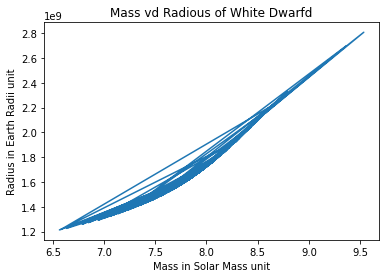

In [64]:
#Plotting M vs R
plt.plot(M_list, R_list)
plt.xlabel('Mass in Solar Mass unit')
plt.ylabel('Radius in Earth Radii unit')
plt.title('Mass vd Radious of White Dwarfd')
plt.show()

In [65]:
#fiiting Data
#A cut-off for low_mass stars
bound = 7.8
def fit_fun(M, y, x):
    R = y*M**x
    return R
low_M_list = [ M_list[i] for i in range(n) if M_list[i]<bound]
low_R_list = [ R_list[i] for i in range(n) if M_list[i]<bound]
fit_parameters = curve_fit(fit_fun, low_M_list, low_R_list)[0]
x = fit_parameters[1]
y = fit_parameters[0]

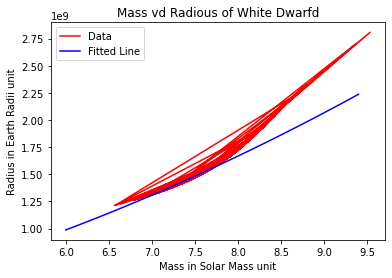

In [66]:
#Plotting fitted line
x_list = np.arange(6.0, 9.5, 0.1)
y_list = y*x_list**x
plt.plot(M_list, R_list, color = 'r', label = 'Data')
plt.plot(x_list, y_list, color = 'b', label = 'Fitted Line')
plt.xlabel('Mass in Solar Mass unit')
plt.ylabel('Radius in Earth Radii unit')
plt.title('Mass vd Radious of White Dwarfd')
plt.legend()
plt.show()

In [110]:
def find_data(a, b):
    delta = a*1e-2
    a = a + delta
    check = 0
    i = b
    a = Guess_y
    while check <1:
        tried_y = (R_list[i]/(M_list[i])**x)
        start_y = tried_y - 0.1*delta
        end_y = tried_y + 0.1*delta
        if start_y <= a <= end_y:
            check = 1
        else:
            i += 1
    return i

In [129]:
Guess_y = y
size = 15
tried_R_list = np.zeros(size)
tried_M_list = np.zeros(size)
k = 0
for i in range(size):
    j = find_data(Guess_y, k)
    tried_R_list[i] = R_list[j]
    tried_M_list[i] = M_list[j]
    Guess_y = tried_y
    k = j + 1

[1.55977945e+09 1.67548966e+09 1.68063736e+09 1.67958546e+09
 1.67548966e+09 1.67958546e+09 1.67864003e+09 1.67758930e+09
 1.67958546e+09 1.68474490e+09 1.67947956e+09 1.67864003e+09
 1.68053141e+09 1.67548966e+09 1.67842830e+09]


In [132]:
sample_fit_parameters = curve_fit(fit_fun, tried_M_list, tried_R_list, maxfev = 1000)[0]
sample_x = sample_fit_parameters[1]
sample_y = sample_fit_parameters[0]

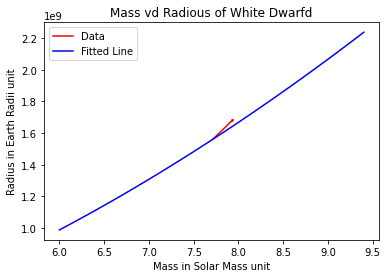

In [138]:
#Plotting fitted line
sample_x_list = np.arange(6.0, 9.5, 0.1)
sample_y_list = y*sample_x_list**x
plt.plot(tried_M_list, tried_R_list, color = 'r', label = 'Data')
plt.plot(sample_x_list, sample_y_list, color = 'b', label = 'Fitted Line')
plt.xlabel('Mass in Solar Mass unit')
plt.ylabel('Radius in Earth Radii unit')
plt.title('Mass vd Radious of White Dwarfd')
plt.legend()
plt.show()